# Classical Component VQE

In [1]:
import qsharp
# qsharp.reload() helped when couldn't locate any namespaces
# qsharp.get_available_operations_by_namespace() was good for debugging

Preparing Q# environment...


In [2]:
qsharp.get_available_operations_by_namespace()

{'SLAP': ['Ansatz', 'GetEnergyByTrotterization', 'VQEGetEnergy']}

In [3]:
packs = qsharp.Packages(qsharp.client)
packs.add(package_name="Microsoft.Quantum.Chemistry")

Adding package Microsoft.Quantum.Chemistry.

In [4]:
qsharp.reload()
qsharp.get_available_operations_by_namespace()

Reloading workspace.

{'SLAP': ['Ansatz', 'GetEnergyByTrotterization', 'VQEGetEnergy']}

In [5]:
from SLAP import VQEGetEnergy

In [6]:
from qdk.chemistry import Molecule
from qdk.chemistry.broombridge import load_and_encode

Adding package microsoft.quantum.chemistry.jupyter.

In [7]:
caffine = Molecule.from_xyz("data/caffeine/caffeine.xyz")

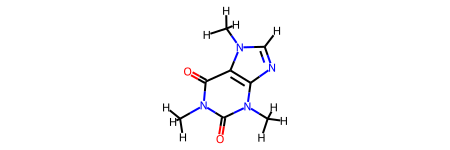

In [8]:
caffine.mol

In [9]:
encoded_data_caffeine = load_and_encode("data/caffeine/caffeine.yaml")

In [11]:
VQEGetEnergy.simulate(
    JWEncodedData=encoded_data_caffeine,
    theta1=0.001,
    theta2=-0.001,
    theta3=0.001,
    nSamples=10000000
)

-627.6287404054326

In [12]:
from scipy.optimize import minimize

def VQEGetEnergyWrapper(var_params, num_samples) -> float:
    theta1, theta2, theta3 = var_params
    return VQEGetEnergy.simulate(
        JWEncodedData=encoded_data_caffeine,
        theta1=theta1,
        theta2=theta2,
        theta3=theta3,
        nSamples=num_samples
    )

def VQE_Classical_Routine(initial_var_params, num_samples):
    """ Run VQE Optimization to find the optimal energy and the associated variational parameters """
    opt_result = minimize(
        VQEGetEnergyWrapper,
        initial_var_params,
        args=(num_samples,),
        method="COBYLA",
        tol=0.000001,
        options={'disp': True, 'maxiter': 200,'rhobeg' : 0.05}
    )

    if opt_result.success:
        print(opt_result.message)
        print(f"Lowest Energy: {opt_result.fun} Ha")
        print(f"Number of evaluations: {opt_result.nfev}")
        print(f"Optimal parameters found: {opt_result.x}")

    return opt_result